In [12]:
# import package
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [13]:
#Bài 1
np.random.seed(2)
means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 30
X0 = np.random.multivariate_normal(means[0], cov, N).T
X1 = np.random.multivariate_normal(means[1], cov, N).T
X = np.concatenate((X0, X1), axis = 1)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1)
# Xbar
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)

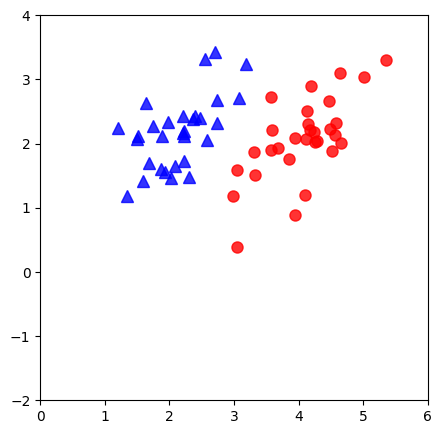

In [14]:
fig, ax = plt.subplots(figsize=(5, 5))
ani = plt.cla()
#plot points
ani = plt.plot(X0[0, :], X0[1, :], 'b^', markersize = 8, alpha = .8)
ani = plt.plot(X1[0, :], X1[1, :], 'ro', markersize = 8, alpha = .8)
ani = plt.axis([0 , 6, -2, 4])
plt.show()

In [15]:
# Define h_w(x):= W^T.x + w_0 = \bar{W}^T . \bar{x}
def h(w, x):
  return np.sign(np.dot(w.T, x))

In [16]:
#Stop condition
def has_converged(X, y, w):
  return np.array_equal(h(w, X), y) #True if h(w, X) == y else False

In [17]:
def perceptron(X, y, w_init):
  w = [w_init]
  N = X.shape[1]
  mis_points = [] # set of miss position points
  iter = 0
  max_iter = 10000
  while iter < max_iter:
    # mix data
    mix_id = np.random.permutation(N)
    for i in range(N):
      xi = X[:, mix_id[i]].reshape(3, 1)
      yi = y[0, mix_id[i]]
      if h(w[-1], xi)[0] != yi:
        mis_points.append(mix_id[i])
        w_new = w[-1] + yi*xi
        w.append(w_new)
        iter = iter + 1
    if has_converged(X, y, w[-1]):
      break
  return (w, mis_points)

In [18]:
d = X.shape[0]
w_init = np.random.randn(d, 1)
(w, m) = perceptron(X, y, w_init)
print(w[-1])

[[ 13.97858527]
 [-15.02901929]
 [ 14.38743059]]


In [19]:
def draw_line(w):
  w0, w1, w2 = w[0], w[1], w[2]
  if w2 != 0:
    x11, x12 = -100, 100
    return plt.plot([x11, x12], [-(w1*x11 + w0)/w2, -(w1*x12 + w0)/w2], 'k')
  else:
    x10 = -w0/w1
    return plt.plot([x10, x10], [-100, 100], 'k')

MovieWriter imagemagick unavailable; using Pillow instead.


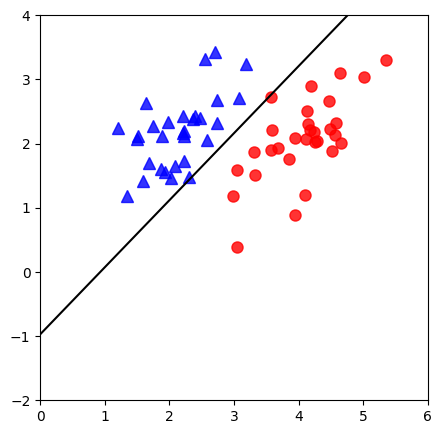

In [20]:
## Visualization
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
def viz_alg_1d_2(w):
  it = len(w)
  fig, ax = plt.subplots(figsize=(5, 5))
  def update(i):
    ani = plt.cla()
    #points
    ani = plt.plot(X0[0, :], X0[1, :], 'b^', markersize = 8, alpha = .8)
    ani = plt.plot(X1[0, :], X1[1, :], 'ro', markersize = 8, alpha = .8)
    ani = plt.axis([0 , 6, -2, 4])
    i2 = i if i < it else it-1
    ani = draw_line(w[i2])
    if i < it-1:
      # draw one misclassified point
      circle = plt.Circle((X[1, m[i]], X[2, m[i]]), 0.15, color='k', fill = False)
      ax.add_artist(circle)
      # hide axis
      cur_axes = plt.gca()
      cur_axes.axes.get_xaxis().set_ticks([])
      cur_axes.axes.get_yaxis().set_ticks([])
      label = 'PLA: iter %d/%d' %(i2, it-1)
      ax.set_xlabel(label)
      return ani, ax
  anim = FuncAnimation(fig, update, frames=np.arange(0, it + 2), interval=1000)
  # save
  anim.save('D:\\pla_vis.gif', dpi = 100, writer = 'imagemagick')
  plt.show()
viz_alg_1d_2(w)

In [21]:
#Bài 2
import pandas as pd
import numpy as np
main_df = pd.read_csv('sonar.all-data.csv',header=None)
main_df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


<Axes: >

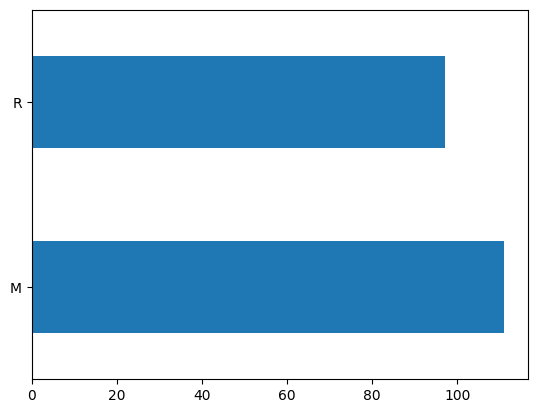

In [22]:
main_df[60].value_counts().plot(kind='barh')

In [23]:
inputs_df = main_df.drop(60, axis=1)
y_df = main_df[60]
targes_label = {'M': 1,'R': -1}
targes_df = [targes_label[item] for item in y_df]
print(targes_df)

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [24]:
inputs_df = main_df.drop(60, axis=1)
x0 = np.ones(( inputs_df.shape[0], 1))
X = np.concatenate((x0, inputs_df), axis = 1)

In [25]:
def perceptron(X, y, w_init, max_iters=100):
    w = [w_init]
    N = X.shape[1]
    mis_points = [] # set of miss position points
    d = X.shape[0]
    
    for iter in range(max_iters):
        # mix data
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(d, 1)
            yi = y[0, mix_id[i]]
            if h(w[-1], xi)[0] != yi:
                mis_points.append(mix_id[i])
                w_new = w[-1] + yi*xi
                w.append(w_new)

        if has_converged(X, y, w[-1]):
            break
            
    return (w, mis_points)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, targes_df, test_size=0.30, random_state=42)

d = X_train.T.shape[0]
w_init = np.random.randn(d, 1)
(w, m) = perceptron(X_train.T, np.array([y_train]), w_init, max_iters=300)
print(w[-1][ :5])
# X_train.T

[[-23.57617529]
 [ 25.50830916]
 [  2.79259266]
 [-16.27313949]
 [ 53.47701837]]


In [27]:
w[-1].shape, X.shape

((61, 1), (208, 61))

In [28]:
def predict(w, X):
    y_predict = h(w, X) 
    return np.squeeze(y_predict)
    
y_predict = predict(w[-1], X_test.T)
y_predict

array([ 1., -1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1.,
        1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1., -1., -1., -1.,
       -1., -1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1., -1., -1.,
       -1., -1., -1., -1.,  1., -1.,  1.,  1.,  1., -1., -1., -1.,  1.,
       -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1.])

In [29]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

accuracy = accuracy_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)

print(f'Accuracy: {accuracy} \nRecall: {recall} \nPrecision: {precision}')

Accuracy: 0.746031746031746 
Recall: 0.8 
Precision: 0.7567567567567568


In [30]:
#Bài 3
from sklearn import datasets
cancer_data = datasets.load_breast_cancer()
# show to test record 5th
print(cancer_data.data[5])
print(cancer_data.data.shape)
#target set
print(cancer_data.target)

[1.245e+01 1.570e+01 8.257e+01 4.771e+02 1.278e-01 1.700e-01 1.578e-01
 8.089e-02 2.087e-01 7.613e-02 3.345e-01 8.902e-01 2.217e+00 2.719e+01
 7.510e-03 3.345e-02 3.672e-02 1.137e-02 2.165e-02 5.082e-03 1.547e+01
 2.375e+01 1.034e+02 7.416e+02 1.791e-01 5.249e-01 5.355e-01 1.741e-01
 3.985e-01 1.244e-01]
(569, 30)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 

In [31]:
from sklearn.model_selection import train_test_split

cancer_data = datasets.load_breast_cancer()
target = cancer_data.target
# convert 0 to -1
index = np.where(target==0)
target[index] = -1

X_train, X_test, y_train, y_test = train_test_split(cancer_data.data, target, 
                                                    test_size=0.3,random_state=109)

In [32]:
d = X_train.T.shape[0]
w_init = np.random.randn(d, 1)
(w, m) = perceptron(X_train.T, np.array([y_train]), w_init, max_iters=300)
print(w[-1][:5])

[[ 7.52810954e+03]
 [-5.26471264e+03]
 [ 3.21373274e+04]
 [ 3.60034184e+03]
 [-2.03762746e+01]]


In [33]:
y_predict = predict(w[-1], X_test.T)
y_predict

array([-1.,  1., -1., -1., -1., -1.,  1.,  1., -1., -1., -1., -1.,  1.,
       -1., -1.,  1., -1., -1., -1., -1.,  1., -1., -1., -1., -1.,  1.,
       -1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1.,  1., -1., -1., -1.,
       -1., -1., -1., -1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1.,
       -1.,  1.,  1., -1.,  1.,  1.,  1., -1., -1.,  1., -1.,  1., -1.,
       -1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1., -1.,  1., -1., -1.,
        1.,  1., -1.,  1.,  1., -1., -1., -1.,  1.,  1., -1.,  1., -1.,
       -1., -1., -1.,  1.,  1., -1.,  1., -1., -1., -1.,  1., -1., -1.,
        1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1., -1., -1., -1., -1.,
        1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1., -1.,  1.,
       -1., -1., -1., -1., -1.,  1., -1., -1.,  1.,  1.,  1., -1.,  1.,
       -1., -1., -1.,  1., -1., -1., -1.,  1., -1.,  1.,  1.,  1., -1.,
       -1.,  1., -1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1.,
        1.,  1.])

In [34]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

accuracy = accuracy_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)

print(f'Accuracy: {accuracy} \nRecall: {recall} \nPrecision: {precision}')

Accuracy: 0.8128654970760234 
Recall: 0.7037037037037037 
Precision: 1.0


In [35]:
cancer_data = datasets.load_breast_cancer()

X = cancer_data.data
y = cancer_data.target
# convert 0 to -1
index = np.where(y==0)
y[index] = -1

X, y

(array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1,
         1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,
         1,  1, -1,  1, -1, -1,  1, -1,  1, -1, -1,  1,  1,  1, -1, -1,  1,
        -1, -1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -

In [36]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=2)

# Scale
sc = StandardScaler()
X_centered = sc.fit_transform(X)

X_pca = pd.DataFrame(pca.fit_transform(X_centered))
X_pca

,0,1
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


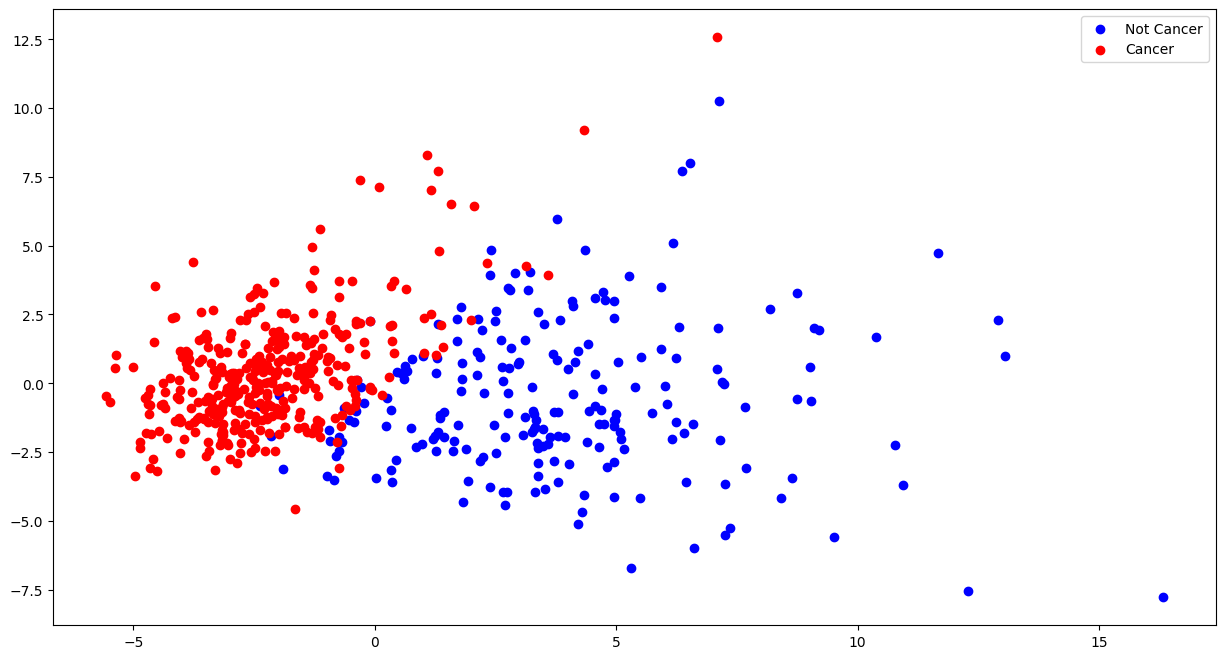

In [37]:
indexNotCancer = np.squeeze(np.where(y == -1))
indexCancer = np.squeeze(np.where(y == 1))

X0, y0 = X_pca.iloc[indexNotCancer, :], y[indexNotCancer]
X1, y1 = X_pca.iloc[indexCancer, :], y[indexCancer]

plt.figure(figsize=(15, 8))
plt.scatter(X0.iloc[:, 0], X0.iloc[:, 1], color='b', label='Not Cancer')
plt.scatter(X1.iloc[:, 0], X1.iloc[:, 1], color='r', label='Cancer')
plt.legend()

In [38]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, 
                                                    test_size=0.3,random_state=109)
lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression()

In [39]:
y_predict = lr.predict(X_test)
y_predict

array([ 1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1,  1, -1,
       -1,  1, -1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1,
        1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1, -1,  1, -1, -1,  1,  1,
        1,  1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1,
        1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,
        1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1,  1, -1,  1,
        1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1, -1, -1, -1,  1,  1,  1,
        1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1])

In [40]:
accuracy = accuracy_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)

print(f'Accuracy: {accuracy} \nRecall: {recall} \nPrecision: {precision}')

Accuracy: 0.9649122807017544 
Recall: 0.9907407407407407 
Precision: 0.9553571428571429


In [41]:
#Bài 4
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

In [43]:
data = pd.read_csv("framingham.csv")
data.head()
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [44]:
data=data.dropna(how="any", axis=0)
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [45]:
X = data.drop(columns=["TenYearCHD"])
y = data["TenYearCHD"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision )


Accuracy: 0.8413855970829535
Recall: 0.034482758620689655
Precision: 0.5


c:\users\laptopdt\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
import numpy as np
X = data.drop(columns=["TenYearCHD"])
y = data["TenYearCHD"]
# convert 0 to -1
y[y == 0] = -1
print(y)


0      -1
1      -1
2      -1
3       1
4      -1
       ..
4231   -1
4232    1
4233    1
4234   -1
4237   -1
Name: TenYearCHD, Length: 3656, dtype: int64


In [47]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,random_state=109)
model = Perceptron(random_state=300)
model.fit(X_train, y_train)


Perceptron(random_state=300)

In [48]:
y_predict = model.predict(X_test)
y_predict

array([ 1, -1, -1, ..., -1,  1,  1], dtype=int64)

In [49]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

accuracy = accuracy_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)

print(f'Accuracy: {accuracy} \nRecall: {recall} \nPrecision: {precision}')

Accuracy: 0.41659070191431175 
Recall: 0.8012422360248447 
Precision: 0.17503392130257803
